# 什么是序列模型？
    想象一下你正在看网飞（Netflix，一个国外的视频网站）上的电影。作为一名忠实的用户，你对每一部电影都给出评价，毕竟一部好电影需要更多的支持和认可。然而事实证明，事情并不那么简单。随着时间的推移，人们对电影的看法会发生很大的变化。事实上，心理学家甚至对这些现象起了名字：
* *锚定*（anchoring）效应：基于其他人的意见做出评价。

  例如，奥斯卡颁奖后，受到关注的电影的评分会上升，尽管它还是原来那部电影。
  这种影响将持续几个月，直到人们忘记了这部电影曾经获得的奖项。
  结果表明（ :cite:`Wu.Ahmed.Beutel.ea.2017`），这种效应会使评分提高半个百分点以上。
* *享乐适应*（hedonic adaption）：人们迅速接受并且适应一种更好或者更坏的情况
  作为新的常态。
  
  例如，在看了很多好电影之后，人们会强烈期望下部电影会更好。
  因此，在许多精彩的电影被看过之后，即使是一部普通的也可能被认为是糟糕的。
* *季节性*（seasonality）：少有观众喜欢在八月看圣诞老人的电影。
* 有时，电影会由于导演或演员在制作中的不当行为变得不受欢迎。
* 有些电影因为其极度糟糕只能成为小众电影。*Plan9from Outer Space*和*Troll2*就因为这个原因而臭名昭著的。 

简而言之，电影的评分不是固定不变的。因此，使用时间动力学可以得到更准确的电影推荐。当然，序列模型不仅仅是关于电影的评分。下面给出了更多的应用场景：
* 在使用应用程序时，许多用户都有很强的特定习惯。
  例如，在学生放学后社交媒体应用更受欢迎。在市场开放时股市交易软件更常用。
* 预测明天的股价要比过去的股价更困难，尽管两者都只是估计一个数字。
  毕竟，先见之明比事后诸葛亮难得多。
  在统计学中，前者（对超出已知观测范围进行预测）称为*外推法*（extrapolation），
  而后者（在现有观测值之间进行估计）称为*内插法*（interpolation）。
* 在本质上，音乐、语音、文本和视频都是连续的。
  如果它们的序列被我们重排，那么就会失去原有的意义。
  比如，一个文本标题“狗咬人”远没有“人咬狗”那么令人惊讶，尽管组成两句话的字完全相同。
* 地震具有很强的相关性，即大地震发生后，很可能会有几次小余震，
  这些余震的强度比非大地震后的余震要大得多。
  事实上，地震是时空相关的，即余震通常发生在很短的时间跨度和很近的距离内。
* 人类之间的互动也是连续的，这可以从微博上的争吵和辩论中看出。

## 统计工具
    处理序列数据需要统计工具和新的深度神经网络架构。为了简单起见，我们以 所示的股票价格（富时100指数）为例。
<img src="pic\1.png" width="500"/>

其中，用$x_t$表示价格，即在*时间步*（time step）
$t \in \mathbb{Z}^+$时，观察到的价格$x_t$。
请注意，$t$对于本文中的序列通常是离散的，并在整数或其子集上变化。
假设一个交易员想在$t$日的股市中表现良好，于是通过以下途径预测$x_t$：
    $$x_t \sim P(x_t \mid x_{t-1}, \ldots, x_1).$$

## 自回归模型
为了实现这个预测，交易员可以使用回归模型，例如在感知机中训练的模型。仅有一个主要问题：输入数据的数量，输入$x_{t-1}, \ldots, x_1$本身因$t$而异。也就是说，输入数据的数量这个数字将会随着我们遇到的数据量的增加而增加，因此需要一个近似方法来使这个计算变得容易处理。本章后面的大部分内容将围绕着如何有效估计$P(x_t \mid x_{t-1}, \ldots, x_1)$展开。

<img src="pic\2.jpg" width="500"/>

简单地说，它归结为以下两种策略。
* 第一种策略，假设在现实情况下相当长的序列$x_{t-1}, \ldots, x_1$可能是不必要的，、因此我们只需要满足某个长度为$\tau$的时间跨度，即使用观测序列$x_{t-1}, \ldots, x_{t-\tau}$。当下获得的最直接好处就是参数的数量总是不变的，至少在$t > \tau$时如此，这就使我们能够训练一个上面提及的深度网络。
这种模型被称为**自回归模型**（autoregressive models），
因为它们是对自己执行回归。

* 第二种策略（**主要理解的方法**），如下图所示，是保留一些对过去观测的总结$h_t$，并且同时更新预测$\hat{x}_t$和总结$h_t$。这就产生了基于$\hat{x}_t = P(x_t \mid h_{t})$估计$x_t$，以及公式$h_t = g(h_{t-1}, x_{t-1})$更新的模型。由于$h_t$从未被观测到，这类模型也被称为
**隐变量自回归模型**（latent autoregressive models）。

<img src="pic\3.jpg" width="500"/>

这两种情况都有一个显而易见的问题：如何生成训练数据？

一个经典方法是使用历史观测来预测下一个未来观测。显然，我们并不指望时间会停滞不前。然而，一个常见的假设是虽然特定值$x_t$可能会改变，但是序列本身的动力学不会改变。这样的假设是合理的，因为新的动力学一定受新的数据影响，而我们不可能用目前所掌握的数据来预测新的动力学。统计学家称不变的动力学为*静止的*（stationary）。因此，整个序列的估计值都将通过以下的方式获得：

$$P(x_1, \ldots, x_T) = \prod_{t=1}^T P(x_t \mid x_{t-1}, \ldots, x_1).$$


## 马尔可夫模型
回想一下，在自回归模型的近似法中，我们使用$x_{t-1}, \ldots, x_{t-\tau}$而不是$x_{t-1}, \ldots, x_1$来估计$x_t$。只要这种是近似精确的，我们就说序列满足*马尔可夫条件*（Markov condition）。特别是，如果$\tau = 1$，得到一个*一阶马尔可夫模型*（first-order Markov model），
$P(x)$由下式给出：

$$P(x_1, \ldots, x_T) = \prod_{t=1}^T P(x_t \mid x_{t-1}) \text{ 当 } P(x_1 \mid x_0) = P(x_1).$$

<img src="pic\4.jpg" width="500"/>

当假设$x_t$仅是离散值时，这样的模型特别棒，因为在这种情况下，使用动态规划可以沿着马尔可夫链精确地计算结果。例如，我们可以高效地计算$P(x_{t+1} \mid x_{t-1})$：
$$
\begin{aligned}
P(x_{t+1} \mid x_{t-1})
&= \frac{\sum_{x_t} P(x_{t+1}, x_t, x_{t-1})}{P(x_{t-1})}\\
&= \frac{\sum_{x_t} P(x_{t+1} \mid x_t, x_{t-1}) P(x_t, x_{t-1})}{P(x_{t-1})}\\
&= \sum_{x_t} P(x_{t+1} \mid x_t) P(x_t \mid x_{t-1})
\end{aligned}
$$

利用这一事实，**我们只需要考虑过去观察中的一个非常短的历史**：
$P(x_{t+1} \mid x_t, x_{t-1}) = P(x_{t+1} \mid x_t)$。隐马尔可夫模型中的动态规划超出了本节的范围（我们后续会再次遇到），而动态规划这些计算工具已经在控制算法和强化学习算法广泛使用。


## 因果关系

原则上，将$P(x_1, \ldots, x_T)$倒序展开也没什么问题。毕竟，基于条件概率公式，我们总是可以写出：

$$P(x_1, \ldots, x_T) = \prod_{t=T}^1 P(x_t \mid x_{t+1}, \ldots, x_T).$$

事实上，如果基于一个马尔可夫模型，我们还可以得到一个反向的条件概率分布。然而，在许多情况下，数据存在一个自然的方向，即在时间上是前进的。很明显，未来的事件不能影响过去。因此，如果我们改变$x_t$，可能会影响未来发生的事情$x_{t+1}$，但不能反过来。也就是说，如果我们改变$x_t$，基于过去事件得到的分布不会改变。因此，解释$P(x_{t+1} \mid x_t)$应该比解释$P(x_t \mid x_{t+1})$更容易。

例如，在某些情况下，对于某些可加性噪声$\epsilon$，显然我们可以找到$x_{t+1} = f(x_t) + \epsilon$，而反之则不行 :cite:`Hoyer.Janzing.Mooij.ea.2009`。这是个好消息，因为这个前进方向通常也是我们感兴趣的方向。彼得斯等人写的这本书 :cite:`Peters.Janzing.Scholkopf.2017`
已经解释了关于这个主题的更多内容，而我们仅仅触及了它的皮毛。

## 训练
    在了解了上述统计工具后，让我们在实践中尝试一下！ 首先，我们生成一些数据：使用正弦函数和一些可加性噪声来生成序列数据， 时间步为。

torch.Size([1000])


Text(0, 0.5, 'x')

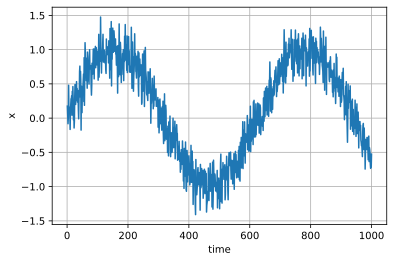

In [50]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  #高清图像
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils  import data 
from d2l import torch as d2l
import numpy as np

t = 1000  # 总共产生1000个点
time = torch.arange(1, t+ 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (t,))  #加上噪音
print(x.shape)
#d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))
fig,ax=plt.subplots()  #创建窗口
plt.grid()  #添加网格
ax.plot(time,x)
plt.xlabel("time")
plt.ylabel("x")

接下来，我们将这个序列转换为模型的“特征－标签”（feature-label）对。基于嵌入维度$\tau$，我们**将数据映射为数据对$y_t = x_t$和$\mathbf{x}_t = [x_{t-\tau}, \ldots, x_{t-1}]$。**
你可能已经注意到，这比我们提供的数据样本少了$\tau$个，因为我们没有足够的历史记录来描述前$\tau$个数据样本。

一个简单的解决办法是：
* 如果拥有足够长的序列就丢弃这几项；
* 另一个方法是用零填充序列。

在这里，我们仅使用前600个“特征－标签”对进行训练。

In [51]:
'''
这里的思想是：利用前四个点预测第五个点
'''
tau=4  #每4个点来预测下一个点
features=torch.zeros((t-tau),tau)
for i in range(tau):  
    features[:,i]=x[i:t-tau+i]  #将数据划分为4列
labels=x[tau:].reshape((-1,1))
#将数据集分装为迭代器
'''数据迭代器'''
def data_iter(data_arrays,batch_size):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=True)


在这里，我们使用一个相当简单的架构训练模型： 一个拥有两个全连接层的多层感知机，ReLU激活函数和平方损失。本模型是拟合模型，所以train的精度为0，缩小结果和真实值的差距。

In [52]:
# 一个简单的多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    return net

In [53]:
'''定义预测准确率函数'''
def acc(y_hat,y):
    '''
    :param y_hat: 接收二维张量，例如 torch.tensor([[1], [0]...])
    :param y: 接收二维张量，例如 torch.tensor([[0.1, 0.2, 0.7], [0.8, 0.1, 0.1]...]) 三分类问题
    :return:
    '''
    y_hat=y_hat.argmax(axis=1)
    cmp=y_hat.type(y.dtype)==y  #数据类型是否相同
    return float(cmp.type(y.dtype).sum())
    
class Accumulator():
    ''' 对评估的正确数量和总数进行累加 '''
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, item):
        return self.data[item]

'''自定义每个批次训练函数'''
def epoch(net,data_iter,loss,optimizer,device,mode=None):
    #创建样本累加器【累加每批次的损失值、样本预测正确的个数、样本总数】
    metric = Accumulator(3)  
    #判断是不是pytorch得model，如果是，就打开训练模式，pytorch得训练模式默认开启梯度更新
    if mode=="train":
        net.train()  #训练模式
        for x,y in data_iter:
            x=x.to(device)                            #<----------------------GPU
            y=y.to(device)
            #前向传播获取预测结果
            y_hat=net(x)
            #计算损失
            l=loss(y_hat,y) 
            #判断是pytorch自带得方法还是我们手写得方法（根据不同得方法有不同得处理方式）
            if isinstance(optimizer,torch.optim.Optimizer):
                #梯度清零
                optimizer.zero_grad()
                #损失之求和，反向传播（pytorch自动进行了损失值计算）
                l.backward()
                #更新梯度
                optimizer.step()
                #累加个参数
                metric.add(
                    float(l)*len(y),  #损失值总数
                    acc(y_hat,y),     #计算预测正确得总数
                    y.size().numel()  #样本总数
                )
    if mode=="test":
        net.eval()  #将模型设置为评估模式
        for x,y in data_iter:
            x=x.to(device)                            #<----------------------GPU
            y=y.to(device)
            #前向传播获取预测结果
            y_hat=net(x)
            #计算损失
            l=loss(y_hat,y) 
            metric.add(
                    float(l)*len(y),  #损失值总数
                    acc(y_hat,y),     #计算预测正确得总数
                    y.size().numel()  #样本总数
                )
    #返回平均损失值，预测正确得概率
    return metric[0]/metric[2],metric[1]/metric[2]

'''正式训练'''
def train(num_epochs,trian_iter,lr,test_iter=None):
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    net=get_net()
    net=net.to(device)  #将网络放在gpu或cpu运行<--------------
    loss_list=[]
    train_acc=[]
    test_acc=[]
    #初始化权重
    def init_weight(m):
        if type(m)==torch.nn.Linear or type(m)==torch.nn.Conv2d:
            torch.nn.init.xavier_normal_(m.weight)
    net.apply(init_weight)
    #损失函数
    loss = nn.MSELoss()  #均方误差
    #优化器
    optimizer=torch.optim.SGD(net.parameters(),lr=lr)
    #训练
    for i in range(num_epochs):
        #返回平均损失值和正确率
        train_metrics=epoch(net,trian_iter,loss,optimizer,device,mode="train")  #<-----训练
        loss_list.append(train_metrics[0])  #保存loss
        train_acc.append(train_metrics[1])   #保存准确率
        #测试集
        #test_metric=test_epoch(net,test_iter,device)     #<-------------测试
        #test_acc.append(test_metric)
        #print(f"epoch{epoch+1}:loss={train_metrics[0]},train_acc={train_metrics[1]*100:.2f}%,test_acc={test_metric*100:.2f}%")
        print(f"epoch{i+1}:loss={train_metrics[0]}")
    
    return loss_list,train_acc,net

In [54]:
batch_size=64
num_epochs=10
lr=0.01
n_train=600  #使用前600个作为训练数据
#数据集
train_iter=data_iter((features[:n_train],labels[:n_train]),batch_size=batch_size)
#训练
loss_list,train_acc,net=train(num_epochs,train_iter,lr)

cpu
epoch1:loss=1.0332127634684245
epoch2:loss=0.581222568154335
epoch3:loss=0.40110019405682884
epoch4:loss=0.30742132941881817
epoch5:loss=0.2503524678945541
epoch6:loss=0.21262402832508087
epoch7:loss=0.1837265549103419
epoch8:loss=0.16157155632972717
epoch9:loss=0.14388089895248413
epoch10:loss=0.12971911589304605


## 预测
由于训练损失很小，因此我们期望模型能有很好的工作效果。 让我们看看这在实践中意味着什么。 首先是检查模型预测下一个时间步的能力， 也就是单步预测（one-step-ahead prediction）。

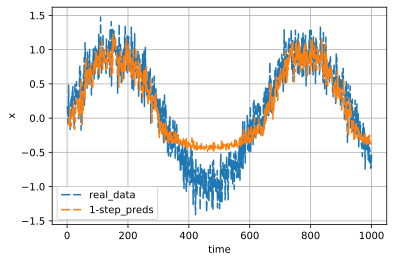

In [56]:
onestep_pred=net(features)  #预测值
time1=time[tau:]
y_hat=onestep_pred.detach().numpy()  #将预测值转为numpy类型

#可视化拟合过程
fig,ax=plt.subplots()  #创建窗口
plt.grid()  #添加网格
ax.plot(time,x,label="real_data",dashes=[6, 2])
ax.plot(time1,y_hat,label="1-step_preds",dashes=[6, 2])
plt.xlabel("time")
plt.ylabel("x")
plt.legend()

正如我们所料，单步预测效果不错。即使这些预测的时间步超过了$600+4$（`n_train + tau`），其结果看起来仍然是可信的。

然而有一个小问题：如果数据观察序列的时间步只到$604$，

我们需要一步一步地向前迈进：
$$
\hat{x}_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}), \\
\hat{x}_{606} = f(x_{602}, x_{603}, x_{604}, \hat{x}_{605}), \\
\hat{x}_{607} = f(x_{603}, x_{604}, \hat{x}_{605}, \hat{x}_{606}),\\
\hat{x}_{608} = f(x_{604}, \hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}),\\
\hat{x}_{609} = f(\hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}, \hat{x}_{608}),\\
\ldots
$$
通常，对于直到$x_t$的观测序列，其在时间步$t+k$处的预测输出$\hat{x}_{t+k}$
称为$k$*步预测*（$k$-step-ahead-prediction）。

由于我们的观察已经到了$x_{604}$，它的$k$步预测是$\hat{x}_{604+k}$。
换句话说，我们必须使用我们自己的预测值（而不是原始数据）来[**进行多步预测**]。
让我们看看效果如何。

(400,) torch.Size([400])


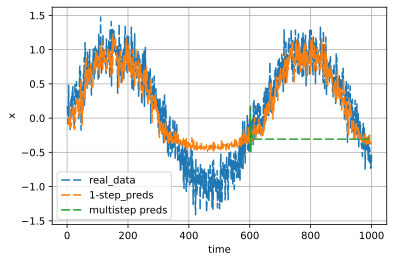

In [61]:
'''这里使用了自己预测的数据作为训练数据'''
multistep_preds=torch.zeros(t)  
multistep_preds[:n_train+tau]=x[:n_train+tau]  #将前604个数据替换
#604~1000
for i in range(n_train + tau,t):
    x1=multistep_preds[i - tau:i].reshape(1,-1)   #1行4列
    multistep_preds[i] = net(x1)   #模型预测值作为预测数据，从604开始
#转换数据格式
multi_y_hat=multistep_preds[n_train:].detach().numpy()  #转为numpy类型
time2=time[n_train:]
print(multi_y_hat.shape,time2.shape)

#可视化
fig,ax=plt.subplots()  #创建窗口
plt.grid()  #添加网格
ax.plot(time,x,label="real_data",dashes=[6, 2])
ax.plot(time1,y_hat,label="1-step_preds",dashes=[6, 2])
ax.plot(time2,multi_y_hat,label="multistep preds",dashes=[6, 2])
plt.xlabel("time")
plt.ylabel("x")
plt.legend()

如上面的例子所示，绿线的预测显然并不理想。
经过几个预测步骤之后，预测的结果很快就会衰减到一个常数。
为什么这个算法效果这么差呢？事实是由于错误的累积：
假设在步骤$1$之后，我们积累了一些错误$\epsilon_1 = \bar\epsilon$。
于是，步骤$2$的输入被扰动了$\epsilon_1$，
结果积累的误差是依照次序的$\epsilon_2 = \bar\epsilon + c \epsilon_1$，
其中$c$为某个常数，后面的预测误差依此类推。
因此误差可能会相当快地偏离真实的观测结果。
例如，未来$24$小时的天气预报往往相当准确，
但超过这一点，精度就会迅速下降。
我们将在本章及后续章节中讨论如何改进这一点。

基于$k = 1, 4, 16, 64$，通过对整个序列预测的计算，
让我们[**更仔细地看一下$k$步预测**]的困难。

torch.Size([933, 68])


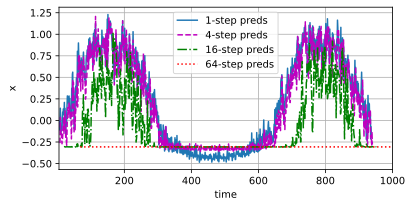

In [62]:
max_steps = 64

features = torch.zeros((t - tau - max_steps + 1, tau + max_steps))
# 列i（i<tau）是来自x的观测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau):
    features[:, i] = x[i: i + t - tau - max_steps + 1]

# 列i（i>=tau）是来自（i-tau+1）步的预测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: t - max_steps + i] for i in steps],
         [features[:, (tau + i - 1)].detach().numpy() for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))